In [64]:
import pandas as pa
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [65]:
df = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter = ';')
df.head()

,lightness,width,species
0,9.710457,8.673699,0
1,6.528089,7.330887,0
2,1.770695,7.599677,0
3,4.819293,7.328198,0
4,6.769638,8.575629,0


In [66]:
print('Espèces : ', df.species.unique())
print('Taille de l\'échantillon : ', len(df.lightness))

Espèces :  [0 1]
Taille de l'échantillon :  1500


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lightness  1500 non-null   float64
 1   width      1500 non-null   float64
 2   species    1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [68]:
sizeGTSalmon = len(df[df.species==1])
sizeGTBass = len(df[df.species==0])
print(f'Il y a {sizeGTSalmon} saumons et {sizeGTBass} bars')

Il y a 500 saumons et 1000 bars


In [69]:
df

,lightness,width,species
0,9.710457,8.673699,0
1,6.528089,7.330887,0
2,1.770695,7.599677,0
3,4.819293,7.328198,0
4,6.769638,8.575629,0
...,...,...,...
1495,14.357080,11.631304,1
1496,9.810589,12.803998,1
1497,15.620085,13.078456,1
1498,9.218976,10.532814,1


In [70]:
#df.frac(1)

In [71]:
fishes = df.sample(frac=1)

In [72]:
fishes

,lightness,width,species
425,7.581043,6.055482,0
873,2.923339,9.241601,0
466,1.894585,7.484014,0
49,3.749952,7.719484,0
122,6.871466,7.651733,0
...,...,...,...
359,4.811497,9.077140,0
820,3.150498,8.276011,0
59,4.705048,8.634745,0
914,7.987894,7.016652,0


In [73]:
fishes

,lightness,width,species
425,7.581043,6.055482,0
873,2.923339,9.241601,0
466,1.894585,7.484014,0
49,3.749952,7.719484,0
122,6.871466,7.651733,0
...,...,...,...
359,4.811497,9.077140,0
820,3.150498,8.276011,0
59,4.705048,8.634745,0
914,7.987894,7.016652,0


In [74]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [75]:
train, test = train_test_split(fishes, test_size=.2)
print(len(train))
print(len(test))

1200
300


In [76]:
test

,lightness,width,species
946,7.140251,9.634499,0
1400,11.275839,10.361385,1
1179,8.505492,11.201376,1
425,7.581043,6.055482,0
113,4.296959,8.217738,0
...,...,...,...
192,6.338369,7.703652,0
986,6.150352,7.377415,0
1028,5.308919,11.226335,1
210,4.168077,8.632906,0


In [77]:
x_train = train['width']
y_train = train['species']
x_test = test['width']
y_test = test['species']

mu0 = np.mean(x_train[y_train==0])
s0 = np.std(x_train[y_train==0])

mu1 = np.mean(x_train[y_train==1])
s1 = np.std(x_train[y_train==1])

x_min = min(x_train)
x_max = max(x_train)

x = np.linspace(x_min, x_max, 10000)
y0 = st.norm.pdf(x, mu0, s0)
y1 = st.norm.pdf(x, mu1, s1)

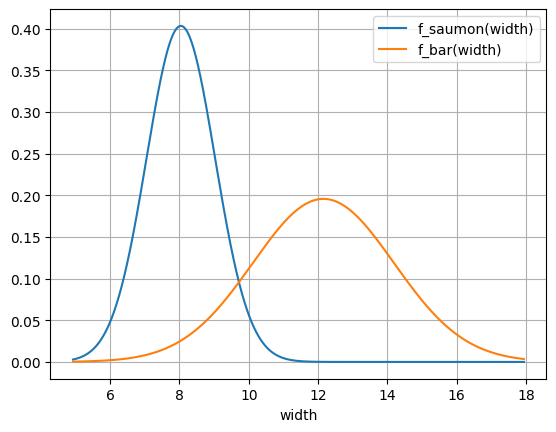

In [78]:
plt.grid()
plt.xlabel('width')
plt.plot(x, y0, label='f_saumon(width)')
plt.plot(x, y1, label='f_bar(width)')
plt.legend(loc='upper right')

In [79]:
def predict(w):
    if st.norm.pdf(w, mu0, s0) > st.norm.pdf(w, mu1, s1):
        return 0
    else:
        return 1

'salmon' if predict(12)==0 else 'bar'

'bar'

In [80]:
y_pred = [predict(x) for x in x_test]
# y_pred

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[185,  12],
       [ 15,  88]])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       197
           1       0.88      0.85      0.87       103

    accuracy                           0.91       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.91      0.91      0.91       300



In [83]:
data = pa.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv',delimiter=';')
data.head()

,lightness,width,species
0,9.710457,8.673699,0
1,6.528089,7.330887,0
2,1.770695,7.599677,0
3,4.819293,7.328198,0
4,6.769638,8.575629,0


In [84]:
X = data[['lightness','width']]
y = data.species
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)

(1500, 2)
(1125, 2)


In [85]:
X_saumon = X_train[y_train==0]
X_bar = X_train[y_train==1]
print(X_saumon.shape)
mean_s = [np.mean(X_saumon.lightness), np.mean(X_saumon.width)]
mean_b = [np.mean(X_bar.lightness),np.mean(X_bar.lightness)]

#print(mean_s)

sigma_s = np.std(X_saumon)
sigma_b = np.std(X_bar)

print(mean_s)
print(sigma_s)

(750, 2)
[4.976941454279748, 8.037206783782851]
lightness    1.863173
width        0.992055
dtype: float64


/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [86]:
def ml_classify(item):
    fs = norm.pdf(item[0], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
    fb = norm.pdf(item[1], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
    return 0 if fs > fb else 1

In [89]:
X_test = np.array(X_test)
y_pred = [ml_classify(x) for x in X_test]

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(cm)
print('Accuracy: {:2.2%}'.format(acc))

/var/folders/pz/wyt_v5kx4glb5jlc7qpj9yzh0000gp/T/ipykernel_10982/2554886561.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fs = norm.pdf(item[0], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
/var/folders/pz/wyt_v5kx4glb5jlc7qpj9yzh0000gp/T/ipykernel_10982/2554886561.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fb = norm.pdf(item[1], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])


[[218  32]
 [ 76  49]]
Accuracy: 71.20%


In [90]:
def map_classify(item):
    p_saumon = len(X_saumon)/len(X_train)
    p_bar = len(X_bar)/len(X_train)
    fs = norm.pdf(item[0], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
    fb = norm.pdf(item[1], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
    ps = p_saumon * fs
    pb = p_bar * fb
    return 0 if ps > pb else 1

In [91]:
y_pred2 = [map_classify(x) for x in X_test]
cm2 = confusion_matrix(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)

print(cm2)
print('Accuracy: {:2.2%}'.format(acc2))

/var/folders/pz/wyt_v5kx4glb5jlc7qpj9yzh0000gp/T/ipykernel_10982/2646767702.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fs = norm.pdf(item[0], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])
/var/folders/pz/wyt_v5kx4glb5jlc7qpj9yzh0000gp/T/ipykernel_10982/2646767702.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fb = norm.pdf(item[1], mean_s[0], sigma_s[0]) * norm.pdf(item[0], mean_s[1], sigma_s[1])


[[238  12]
 [ 79  46]]
Accuracy: 75.73%


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, )